In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Advertising.csv")
pd.set_option('display.max_rows', None)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df.shape

(200, 5)

In [4]:
df.info()
#No Null Values
#Unnamed looks a default columns
#No need Imputation or Encoding required for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()
#Data looks okay

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'],inplace=True, axis=1)

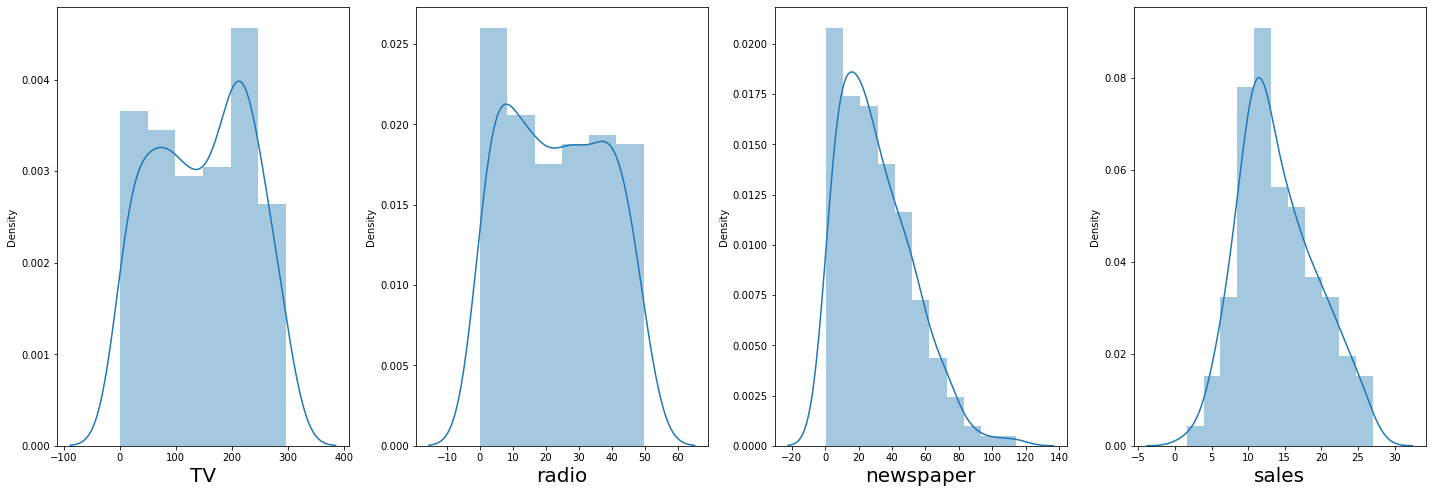

In [8]:
#Check how the data looks, with respect to distribution
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [9]:
df.skew()
#Only Newpaper data requires correlation correction

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

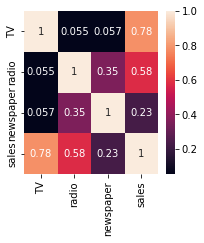

In [10]:
#check for the correlation aspect between the fetures
corr=df.corr()
plt.figure(figsize=(3,3))
sns.heatmap(corr,annot=True)
plt.show()
#Advertisment in TV is more correlated to Sales, then Radio and then Newpaper

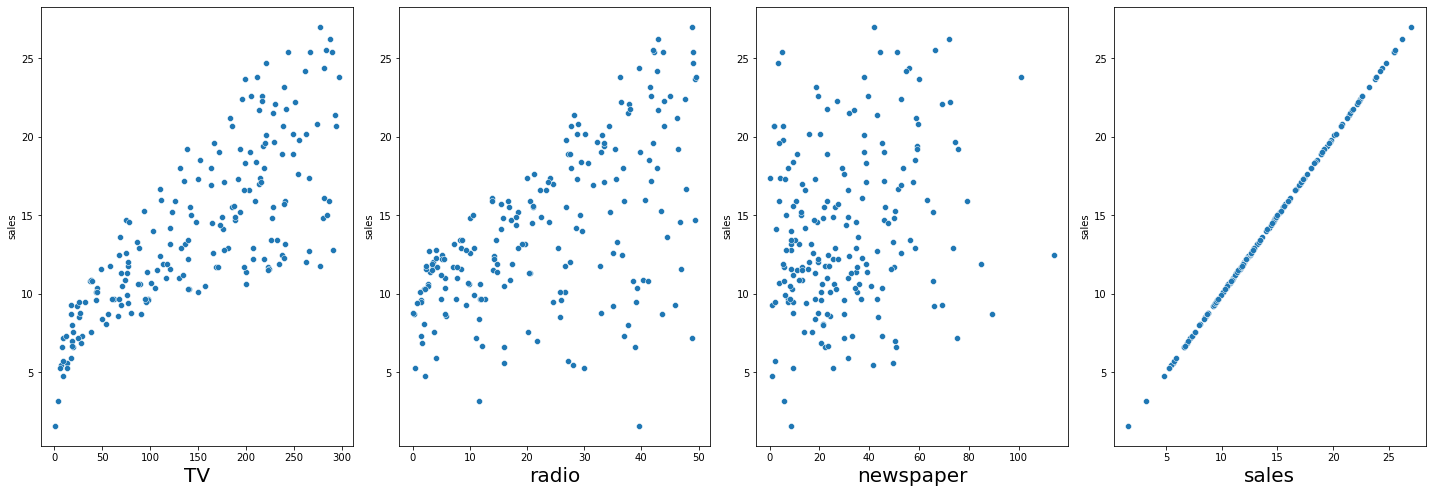

In [11]:
#We do not need to check for multicollinerity as there are 3 means of Adversiment for Total sales
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(df[column],df['sales'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
x=df.drop(columns=['sales'],axis=1)
y=df['sales']

In [13]:
#Let do trasformation of the features o reduce screwness
#Screwness Correction
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew().sort_values(ascending=False)
#Now the screwness is rectified from Fetures
#These values look more convincing

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

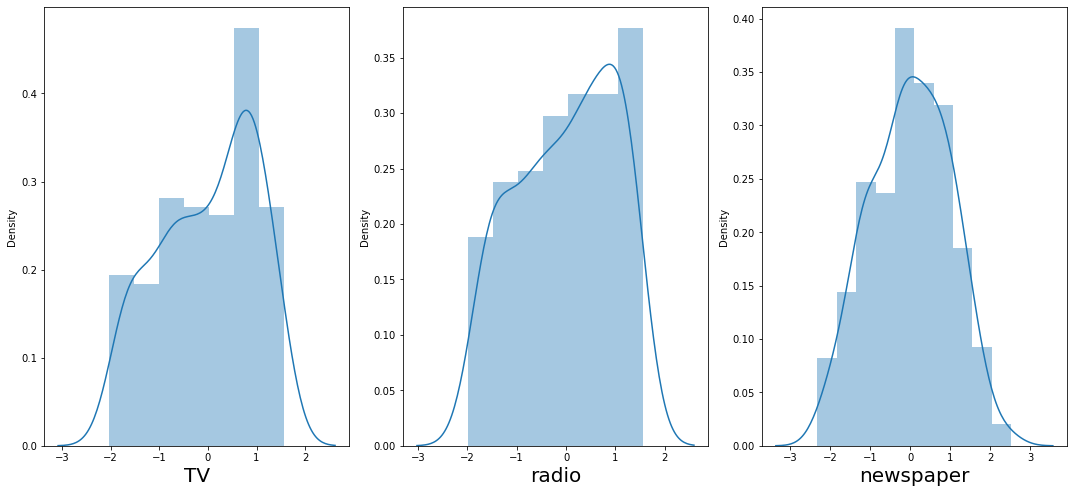

In [14]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [16]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

0.9168572901475455


In [18]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.9648423412170938


In [19]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.9849170531012936


In [20]:
#Lets check if the RF accuracy is not overfitting the model

from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    RFR.fit(x_train,y_train)
    pred_values = RFR.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9749207318241477, 0.98590197170711, 0.9701365375338832, 0.9715283193048726, 0.9603337693753692]
Avg accuracy : 0.9725642659490765


In [21]:
#This model looka good, The cross validation scores and actual scores are not very different
#will Hypertune the model if we can improve the score

In [22]:
from sklearn.model_selection import GridSearchCV

RFR=RandomForestRegressor()
params={'n_estimators':[60,70,90],
        'criterion':['mse','gini'],
        'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
         'min_samples_split':[10,11,15],
         'min_samples_leaf':[4,5]
       }
grd=GridSearchCV(RFR,param_grid=params,)
grd.fit(x_train,y_train)
RFR=grd.best_estimator_
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
RFR_accuracy

0.953954434951006

In [24]:
#Could not improve much on Hypertunning aftermultiple attems also.
with open("RFR", "wb") as f:
    pickle.dump(RFR, f)